# Discrete Fourier Transform in Python

This notebook is a quick refresher on how to perform FFT in python/scipy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.fftpack import fft

We define:

- $N$: number of samples
- $f_s$: sampling frequency/rate in samples/second

In [3]:
N = 1000
f_s = 100

Period between samples $T_s$:

In [4]:
T_s = 1/f_s
print(T_s, "seconds")
print(T_s*1000, "ms")

0.01 seconds
10.0 ms


Create time vector, each element corresponds to a measurement

In [5]:
t = np.linspace(0, T_s*N, N)

The signal which we are sampling:

\begin{align}
s(t) = 0.1 sin(2\pi 5t) + sin(2\pi 3t - 0.25\pi)
\end{align}

In [6]:
x_t = 0.1*np.sin(2*np.pi*5*t) + np.sin(2*np.pi*3*t-np.pi/4)

Text(0.5, 1.0, 'Visualizing samples')

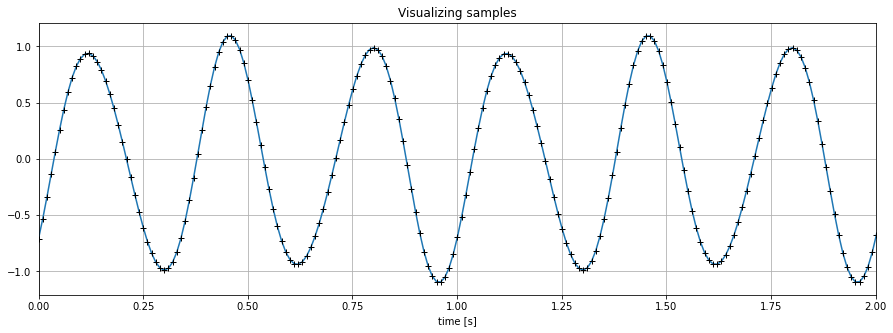

In [7]:
plt.figure(figsize=(15,5))
plt.plot(t, x_t)
plt.plot(t, x_t, "k+")
plt.xlabel("time [s]")
plt.xlim([0, 2])
plt.grid()
plt.title("Visualizing samples")

Note that we can describe the **period** of each sinus component in number of samples:

- $0.1 sin(2\pi 5t)$: **20** samples ($f=5Hz$ leads to $T=1/5Hz=200ms$ with $T_s = 10ms$, $T/T_s = 20$)
- $sin(2\pi 3t - 0.25\pi)$ : **33** samples


Alternatively we can express the frequency in the reciprocal:

- $0.1 sin(2\pi 5t)$: **1/20 = 0.05**
- $sin(2\pi 3t - 0.25\pi)$ : **1/33 = 0.0303**

Alternatively we can express the frequency relative to the number of samples $N=1000$:

- $0.1 sin(2\pi 5t)$: **1000/20 = 50**
- $sin(2\pi 3t - 0.25\pi)$ : **1000/33 = 30.30**

You can think of the last representation as a reference of the highest $T_s$ (or lowest $f_s$) we can extract from FFT. I.e. the FFT method cannot extract frequency information lower than $\frac{f_s}{2}$ (ignore the $\frac{1}{2}$ for now).

## FFT

We perform the FFT on the sample array, note that the time vector ${t}$ is not used in the `fft` call:

In [8]:
a_f = fft(x_t)

In [9]:
a_f.dtype

dtype('complex128')

FFT returns a symmetric shape with positive frequencies on the right side and negative on the left:

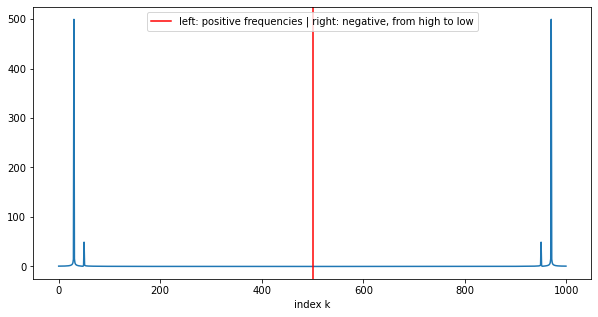

In [10]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f)) # we take abs in order to get the magnitude of a complex number
plt.axvline(N//2, color="red", label="left: positive frequencies | right: negative, from high to low")
plt.xlabel("index k")
plt.legend();

The index $k$ represents a frequency component.

Because we are interested in positive frequencies for now we cut the returned array in half:

In [11]:
a_f_positive = a_f[:N//2]

In [12]:
a_f_positive.shape

(500,)

Each element in `a_f` represents the real and imaginary part (amplitude $A_i$ and phase $\phi_i$) for a specific frequency $f_i$.

The "frequency" after the FFT is defined as $\frac{N}{s_i}$ in the period of specific sinus component. The period $s_i$ is expressed in number of samples.

I.e. a sinus component with a frequency of $5 Hz$ or period of $\frac{1}{5Hz} = 0.2s$ is $\frac{0.2s}{T_s} = \frac{0.2s}{0.01s} = 20$ samples long. Thus its magnitude peak should appear at $\frac{N}{s_i} = \frac{1000}{20} = 50$.

- $0.1 sin(2\pi 5t)$: low peak (because of $0.1$) at $k=50$
- $sin(2\pi 3t - 0.25\pi)$: greater peak at $k= 30.303 \approx 30$

Text(0.5, 0, 'frequency in $k = N/s_i$')

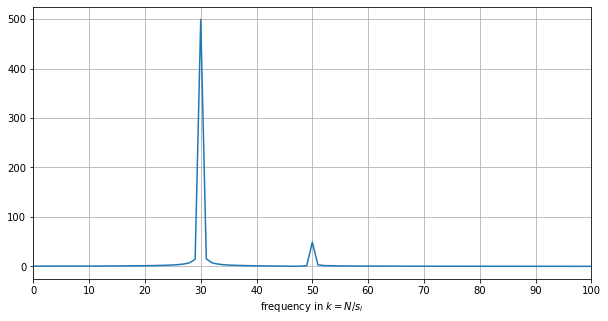

In [13]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f_positive))
plt.xlim([0, 100])
plt.xticks(range(0, 101, 10))
plt.grid()
plt.xlabel("frequency in $k = N/s_i$")

In order to relate the sample-frequencies (as $N/1$) into time domain we need to convert the $k$ into frequencies as $1/s$.



\begin{align}
k = \frac{N}{s_i} = \frac{N}{T_i/T_s} = \frac{N f_i}{1/T_s} = \frac{N f_i}{f_s}
\end{align}

Our translation formula from $k$ to frequency is the following

\begin{align}
\Rightarrow f_i =& f_s\frac{k}{N}
\end{align}

In [14]:
f_i = np.arange(0, N//2)*f_s/N

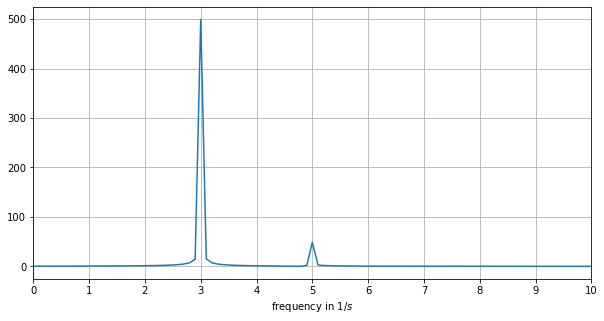

In [15]:
plt.figure(figsize=(10,5))
plt.plot(f_i, np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);

We need to normalize the magnitude of the peaks by the factor of $\frac{2}{N}$:

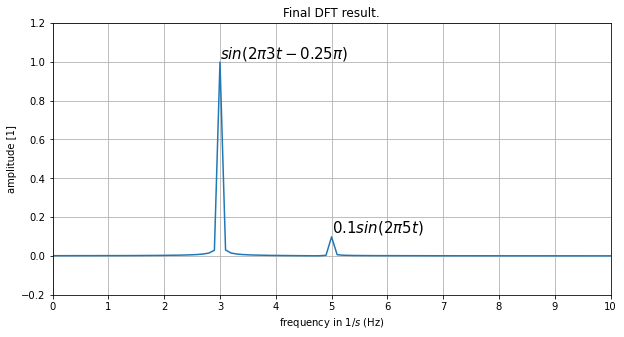

In [16]:
plt.figure(figsize=(10,5))
plt.plot(f_i, 2/N*np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$ (Hz)")
plt.ylabel("amplitude [1]")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);
plt.ylim([-0.2, 1.2]);
plt.title("Final DFT result.")
plt.text(3, 1.02, "$sin(2\pi 3t - 0.25\pi)$", fontdict={"size": 15})
plt.text(5, 0.12, "$0.1 sin(2\pi 5t)$", fontdict={"size": 15});

As you can see we found both sinus components.

## Phase

We could find the magnitudes and the frequencies of both signals but not the $45°$ phase of the slower $3Hz$ signal.

In the previous section we saw that the result of the FFT algorithm is a complex array. Let's plot the real and imaginary parts relative to frequency.

(0.0, 10.0)

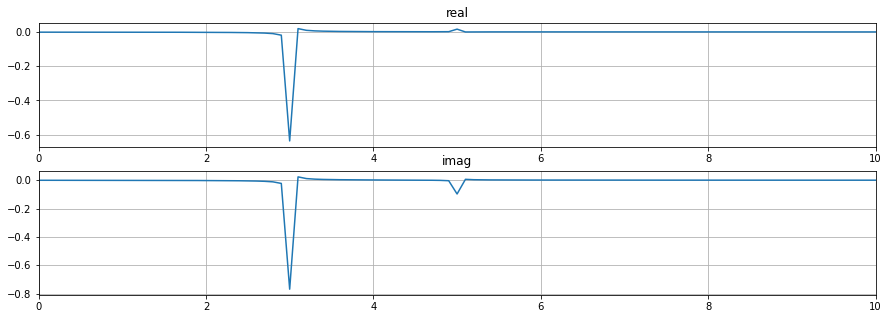

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(2, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])

Lets calculate the angle of the complex number:

\begin{align}
\alpha = \text{arctan} \frac{imag}{real}
\end{align}

There is a handy function: `np.angle` which does it for us.

In [18]:
angle = np.angle(a_f_positive, deg=True)

# OR manually
# angle = np.arctan2(2/N*np.imag(a_f_positive),(2/N*np.real(a_f_positive)))*grad_to_degree_factor

and plot it again

(-150.0, 100.0)

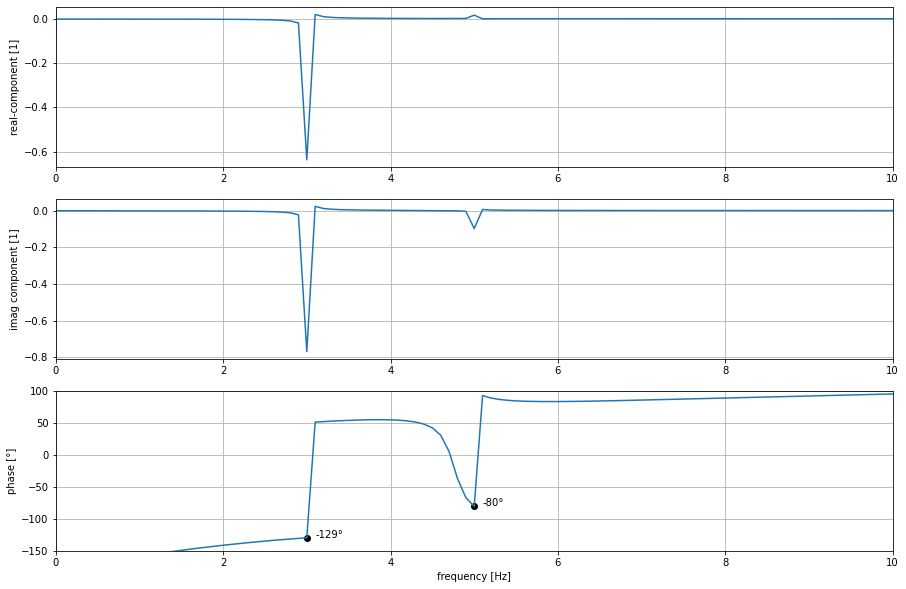

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.ylabel("real-component [1]")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 2)
plt.ylabel("imag component [1]")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 3)
plt.plot(f_i, angle)
plt.grid()
plt.ylabel("phase [°]")
plt.xlabel("frequency [Hz]")
plt.xlim([0, 10])

plt.scatter(f_i[[30, 50]], angle[[30, 50]], color="k")
plt.text(f_i[30] + 0.1 , angle[30], "%d°" % int(angle[30]))
plt.text(f_i[50] + 0.1 , angle[50], "%d°" % int(angle[50]))
plt.ylim([-150, 100])

The $5Hz$ sinus wave with zero phase has an $\alpha \approx -90°$, since a sine wave is a $90°$-shifted cos wave.

The $3Hz$ sinus component with $45°C$ phane has an $\alpha \approx -90°-45° = -145°$ 

## FFT on complex numbers

Because within the multi-chirp FMCW algorithm we do a FFT on a series of complex numbers we want to make a simple example here.

Our example function of interest will be:

\begin{align}
f(t) = 0.25\text{sin}(2\pi 5 t + \phi) \\
\phi = \phi(t) = -\frac{\pi}{8}t = vt
\end{align}

The phase shift is time dependent in this example.

**Goal**: find parameter $v$ via FFT.

In [20]:
def f(t, phi=0):
    return 0.25*np.sin(2*np.pi*5*t + phi)

Let's visualize how the sinus wave develops over time ...

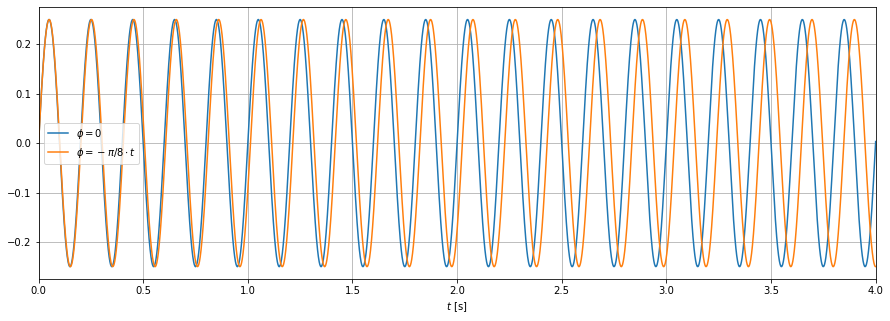

In [21]:
t = np.linspace(0, 10, 10000)
plt.figure(figsize=(15,5))
plt.plot(t, f(t), label="$\phi=0$")
plt.plot(t, f(t, -np.pi/8*t), label="$\phi=-\pi/8 \cdot t$")
plt.xlim([0, 4])
plt.xlabel("$t$ [s]")
plt.grid()
plt.legend();

For the sake of our example we will run the FFT each $T_{cycle}$ seconds.

In [22]:
T_cycle = 2 # seconds
n_cycles = 200
f_cycle = 1/T_cycle

Per cycle FFT config

In [23]:
f_s = 100
T_s = 1/f_s
N = int(T_cycle/T_s)
print("Sample frequency:", f_s, "Hz")
print("Sample period:", T_s, "sec")
print("Number samples:", N)

Sample frequency: 100 Hz
Sample period: 0.01 sec
Number samples: 200


We run FFT in each cycle and save the results in a list.

In [24]:
fft_cycle_results = list() # result list

# for each cycle
for c in range(n_cycles):
    
    # determine start and end of a cycle
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    
    # sample the signal at according timesteps
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f(t_sample, -np.pi/8*t_sample)
    
    # run FFT and append results
    fft_res = fft(f_sample)
    fft_cycle_results.append(fft_res)

We cut the positive frequency range and normalize the amplitudes (see introdcutory example above).

In [25]:
fft_cycle_results = [2/N*r[:N//2] for r in fft_cycle_results]

In [26]:
freq = np.arange(0, N//2)*f_s/N

In [27]:
freq

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5])

**Note**: The FFT frequency resolution is at 1Hz. That's important because the frequency shift by $-\frac{1}{8}Hz$ introduced by $\phi(t)$ is not visible in the FFT!

The FFT will show a peak at 5Hz with a different phase each time.

Because the frequency is almost the same in each cycle, we expect the same behaviour in each result:

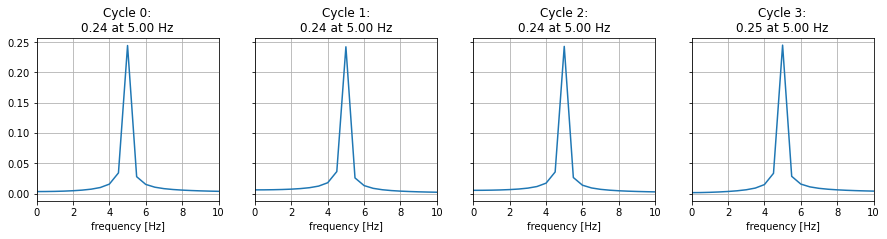

In [28]:
n_cycles_to_display = 4
fft_res_display = fft_cycle_results[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(fft_res_display), figsize=(15, 3), sharex=True, sharey=True)
for i, ax, res in zip(range(n_cycles_to_display), ax, fft_res_display):
    res_abs = np.abs(res)
    ax.plot(freq, res_abs)
    ax.grid(True)
    ax.set_xlim([0, 10])
    ax.set_xlabel("frequency [Hz]")
    
    k = np.argmax(res_abs)
    magn_max = res_abs[k]
    freq_max = freq[k]
    
    ax.set_title("Cycle %d:\n%.2f at %.2f Hz" % (i, magn_max, freq_max))

Looks fine for the first 4 cycles ... Let's look at all cycles by picking the frequency with max. magnitude from each cycle:

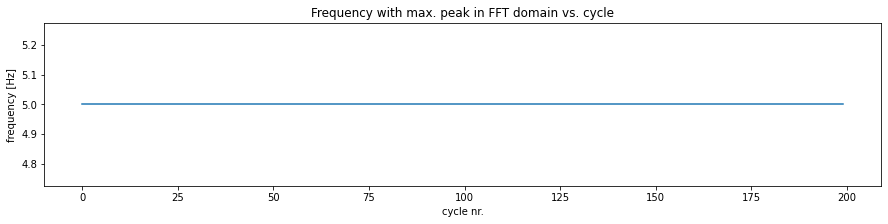

In [29]:
freq_list = list()
for res in fft_cycle_results:
    res_abs = np.abs(res)
    k = np.argmax(res_abs)
    freq_list.append(freq[k])
    
plt.figure(figsize=(15,3))
plt.plot(freq_list)
plt.xlabel("cycle nr.")
plt.ylabel("frequency [Hz]")
plt.title("Frequency with max. peak in FFT domain vs. cycle");

It seems that the position (frequency) of the peaks remains **eqal**, despite the changing real and imaginary components.

Let's collect the max. frequency component from each cycle

In [30]:
cycle_max_list = list()

for res in fft_cycle_results:
    # calc. the magnitude
    res_abs = np.abs(res)
    
    # find frequency index
    k = np.argmax(res_abs)
    cycle_max_list.append(res[k])

... and visualize the complex numbers:

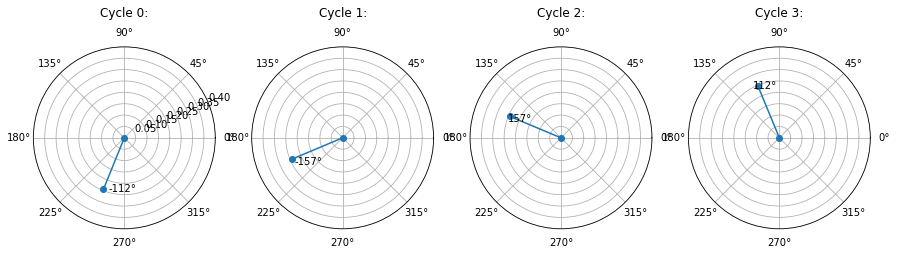

In [34]:
n_cycles_to_display = 4
cycle_max_list_display = cycle_max_list[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(cycle_max_list_display), figsize=(15, 30), 
                       subplot_kw={'projection': "polar"}, sharey=True)

for i, ax, res in zip(range(n_cycles_to_display), ax, cycle_max_list_display):
    ax.plot([0, np.angle(res)], [0, np.abs(res)], marker="o")
    ax.text(np.angle(res)+0.1, np.abs(res), "%d°" % int(np.angle(res, deg=True)))
    ax.set_ylim([0, 0.4])
    ax.set_title("Cycle %d:\n" % (i, ))

We can observe that the angle moves in negative direction with $-45° = T_{cycle}v = 2\frac{\pi}{8} = \pi/4$ per cycle.

### Solution via phase differences

Now we could calculate ange velocity by taking differences between cycles and put them relative to cycle duration:

In [32]:
angle_diff = np.diff(np.angle(cycle_max_list, deg=True))
angle_vel = angle_diff/T_cycle
print(angle_vel[:10])

[-22.57811002 157.25241595 -22.41998496 -22.25432097 -22.57811002
 -22.74758405 -22.41998496 -22.25432097 -22.57811002 157.25241595]


Let's look at the parameter $v = -\frac{\pi}{8}$

In [33]:
v = -np.pi/8*grad_to_degree_factor
print(v)

NameError: name 'grad_to_degree_factor' is not defined

Let's calculate the differences right (to remove the $157°-(-157°)$ effect).

In [ ]:
angle_vel[angle_vel>0] -= 180
print("Angle velocities:", angle_vel[:10])


In [ ]:
plt.figure(figsize=(15,3))
plt.plot(angle_vel)
plt.xlabel("cycle nr.")
plt.ylabel("°/s")
plt.title("angular velocity derived by cycle FFT phase differences")
plt.ylim([-40, 0])

As you can see, the phases of the FFT output from each cycle give a hint over the phase velocity $v$ of the signal in time domain.

**Summary**: We found $v$!

### Solution via second FFT

We can find the phase velocity via a second FFT over the cycle results, too.

Remember, those are our results (FFT-magnitude from the $5Hz$-component):

In [ ]:
cycle_max_list[:5]

In [ ]:
second_fft_res = fft(cycle_max_list)[:n_cycles//2]

In [ ]:
second_fft_res[:5]

In [ ]:
freq_second = np.arange(0, n_cycles//2)*f_cycle/n_cycles
omega_second = 360*freq_second

In [ ]:
omega_second

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(omega_second, np.abs(second_fft_res))
plt.grid()
plt.xlabel("angle velocity $\omega$ [°/s]")
plt.xticks(range(0, 90, 5));

As you could see we could detect the phase change with a second FFT on the results of the first FFT.